In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

<img src="https://s.yimg.com/hd/cp-video-transcode/prod/2020-07/06/5f038bfc92fc281616f5f9ee/5f038c033d95000001136ed0_1280x720_FES_v1.jpg" width=400>

In [2]:
steps = range(50)
df = pd.DataFrame({
    'cost_per_km': 20*[5] + 10*[7.5] + 20*[12],
    'time': (                       # calculate journey time
        23/(90+np.array(steps)) +   # 23km at 90kmh limit
        9/(100+np.array(steps))     # 9km at 100kmh limit
    ) * 60,                         # convert to minutes
    'label': [f'{x} km/h over' for x in steps],  # labels for all points
    'highlight': [1 if x in [10,20,30,35,40,45] else 0 for x in steps]  # highlight selected points
})
df['cost'] = df.cost_per_km.cumsum()
df['saved'] = df.time.iloc[0] - df.time

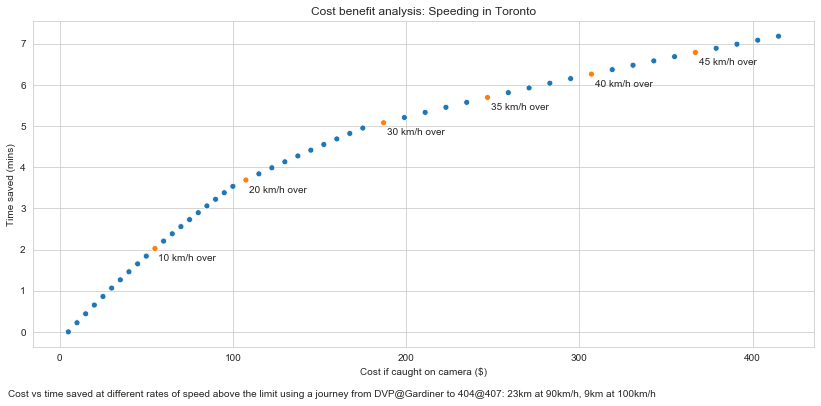

In [3]:
fig, ax = plt.subplots(figsize=(14,6))
sns.scatterplot(
    x='cost', y='saved', hue='highlight',
    data=df, ax=ax, legend=False)

# annotate selected points
for _,(x,y,t) in df[df.highlight==1][['cost','saved','label']].iterrows():
    ax.annotate(t, xy=(x,y), xytext=(x+2,y-0.3))

# add title, caption and axis labels
ax.set_xlabel('Cost if caught on camera ($)')
ax.set_ylabel('Time saved (mins)')
ax.set_title('Cost benefit analysis: Speeding in Toronto')
plt.figtext(0.1, 0.01, 'Cost vs time saved at different rates of speed above the limit using a journey from DVP@Gardiner to 404@407: 23km at 90km/h, 9km at 100km/h')

plt.show()